The XGI library is able to turn the YAML NetworkX graph into a higher-order representation. These examples should help understanding the richness of writing documents using sequences, maps and nesting.

In [4]:
import xgi

from src.nx_yaml import nx_compose_all as load

def draw(stream):
    G = load(stream)
    H = xgi.from_bipartite_graph(G)
    xgi.draw_bipartite(H)

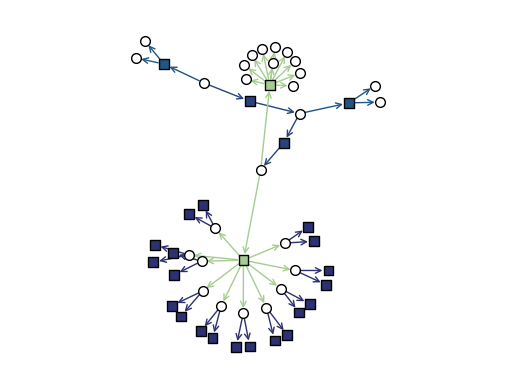

In [9]:
draw("{1, 2, 3, 4, 5}")

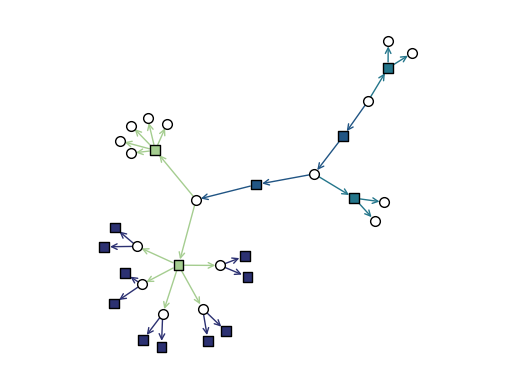

In [6]:
draw("[1, 2, 3, 4, 5]")

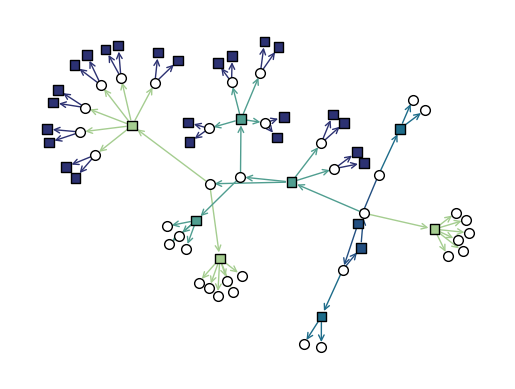

In [15]:
draw("""
a: {8, 9, 2}
{8, 9}: a
""")

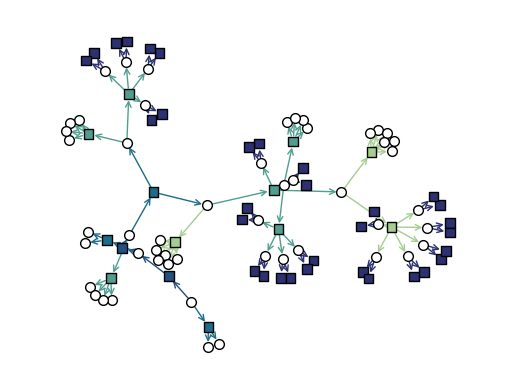

In [19]:
draw("""
- ? {3, 4}
  ? {5, 6, 7}
- {9, a}
""")